## POSTTEST 5

**Import Library**

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report, adjusted_rand_score, normalized_mutual_info_score, homogeneity_score, completeness_score, v_measure_score, mean_absolute_error, mean_squared_error, r2_score

In [5]:
df = pd.read_csv('brain_stroke.csv', delimiter=',')
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
4976,Male,41.0,0,0,No,Private,Rural,70.15,29.8,formerly smoked,0
4977,Male,40.0,0,0,Yes,Private,Urban,191.15,31.1,smokes,0
4978,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,31.8,smokes,0
4979,Male,40.0,0,0,Yes,Private,Rural,83.94,30.0,smokes,0


In [50]:
df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
cluster              0
dtype: int64

## **A. SUPERVISED LEARNING**
***

Mengambil 2 fitur kemudian pisahkan fitur x dan label y

In [6]:
X = df[['age', 'avg_glucose_level']]
y = df['stroke']

***Membagi data ke train set dan test set***

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

***Membuat Objek Classifier SVM***

In [6]:
svm = SVC(kernel="rbf")

***Melatih classifier dengan data train***

In [7]:
svm.fit(X_train, y_train)

SVC()

In [8]:
y_pred = svm.predict(X_test)

Menyimpan nilai support vector dan indeksnya

In [9]:
support_vectors = svm.support_vectors_
support_vector_indices = np.where(np.isin(X_train, support_vectors).all(axis=1))

Plotting menggunakan scatter dari Seaborn

D:\Kecerdasan Buatan\venv_C2-21\feby_137\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


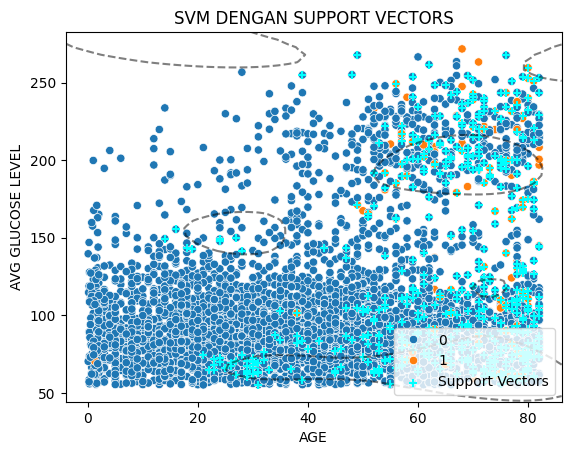

In [12]:
sns.scatterplot(x='age', y='avg_glucose_level', hue='stroke', data=df)
plt.scatter(support_vectors[:, 0], support_vectors[:, 1], s=40, color='cyan', marker='+', label='Support Vectors')
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1]), np.linspace(ylim[0], ylim[1]))
Z = svm.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
ax.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
linestyles=['--', '-', '--'])
plt.xlabel('AGE')
plt.ylabel('AVG GLUCOSE LEVEL')
plt.legend(loc='lower right')
plt.title('SVM DENGAN SUPPORT VECTORS')
plt.show()

In [14]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1417
           1       0.00      0.00      0.00        78

    accuracy                           0.95      1495
   macro avg       0.47      0.50      0.49      1495
weighted avg       0.90      0.95      0.92      1495



D:\Kecerdasan Buatan\venv_C2-21\feby_137\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Kecerdasan Buatan\venv_C2-21\feby_137\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Kecerdasan Buatan\venv_C2-21\feby_137\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Melakukan Prediksi data test dengan model dan menampilkan hasil

In [38]:
y_pred = svm.predict(X_test)
print("MAE       :", mean_absolute_error(y_test, y_pred))
print("MSE       :", mean_squared_error(y_test, y_pred))
print("RMSE      :", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R-Squared :", r2_score(y_test, y_pred))

MAE       : 949.5746549560853
MSE       : 1339147.3061480552
RMSE      : 1157.2153240205796
R-Squared : -0.5868110433429568


***Linear Regression***

Memisahkan fitur dan target dari dataset

In [28]:
X, y = df[['age']], df['avg_glucose_level']

Membagi data fitur dan target menjadi data training

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=31)

Membuat model regresi linear, melatih model dengan data training dan menggunakan model untuk membuat prediksi pada data test

In [30]:
reg = LinearRegression()
reg.fit(X_train, y_train)

y_pred = reg.predict(X_test)

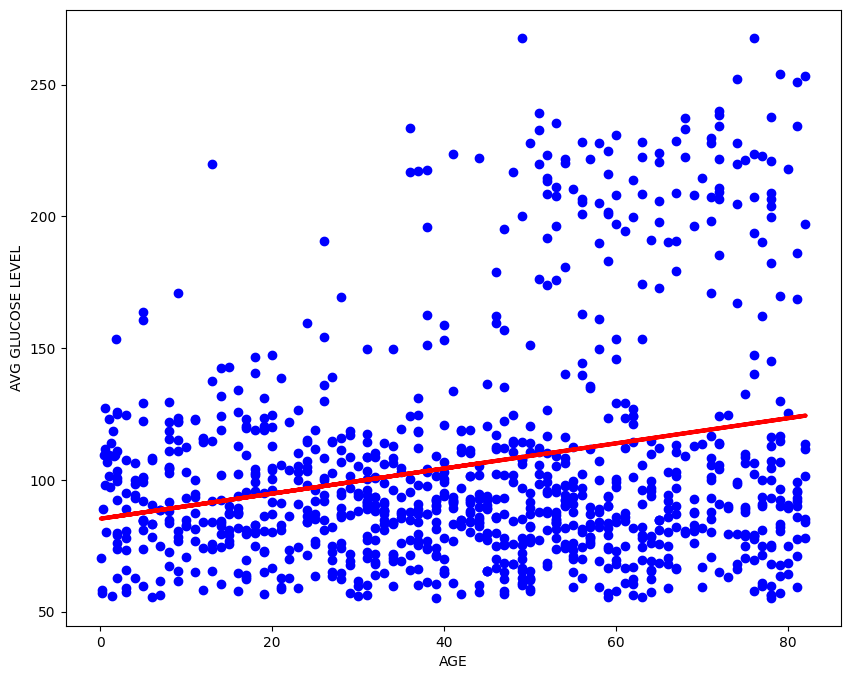

In [31]:
plt.figure(figsize=(10,8))
plt.plot(X_test, y_pred, c='red', linewidth=3)
plt.scatter(X_test, y_test, c='blue')
plt.xlabel("AGE")
plt.ylabel("AVG GLUCOSE LEVEL")
plt.show()

In [32]:
svm = SVC(kernel="linear")

In [33]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)

X_train, X_test, y_train_encoded, y_test = train_test_split(X_train, y_train_encoded, test_size=0.2, random_state=42)

svm = SVC()

# Latih model dengan data pelatihan
svm.fit(X_train, y_train_encoded)

# Sekarang, Anda dapat menggunakan model SVM yang telah dilatih untuk membuat prediksi
y_pred = svm.predict(X_test)

In [34]:
SVC(kernel='linear')

SVC(kernel='linear')

In [39]:
y_pred = svm.predict(X_test)
print("MAE :", mean_absolute_error(y_test, y_pred))
print("MSE :", mean_squared_error(y_test, y_pred))
print("RMSE :", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R-Squared :", r2_score(y_test, y_pred))

MAE : 949.5746549560853
MSE : 1339147.3061480552
RMSE : 1157.2153240205796
R-Squared : -0.5868110433429568


## **B. UNSUPERVISED LEARNING**
***

***B1. Implementasikan metode K-Means***

Menggunakan fitur x dan menentukan banyaknya kelompok

In [35]:
X = df[['age', 'avg_glucose_level']]
K = 2

Inisialisasi K-Means dan melatih model K-Means berdasarkan data X

In [36]:
kmeans = KMeans(n_clusters=K, n_init=10)
kmeans.fit(X)

KMeans(n_clusters=2, n_init=10)

In [40]:
cluster_labels = kmeans.labels_
df["cluster"] = cluster_labels
centroids = kmeans.cluster_centers_

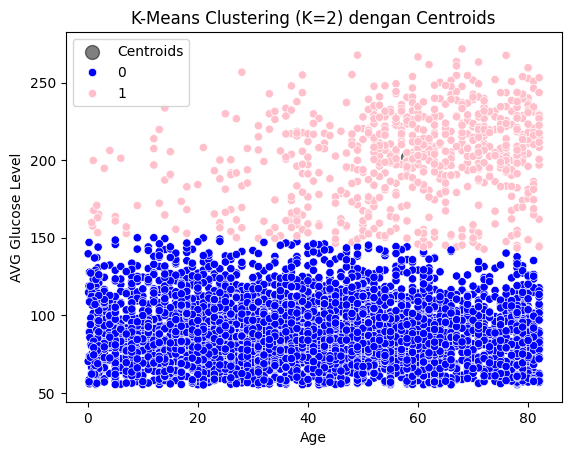

In [42]:
plt.scatter(centroids[:, 0], centroids[:, 1], alpha=0.5, c='black', s=100, label='Centroids')
sns.scatterplot(data=df, x="age", y="avg_glucose_level", hue="cluster", palette=["blue", "pink"])
plt.title(f"K-Means Clustering (K={K}) dengan Centroids")
plt.xlabel("Age")
plt.ylabel("AVG Glucose Level")
plt.legend()
plt.show()

Membuat crosstab untuk membandingkan cluster labels dengan true labels

In [44]:
cross_tab = pd.crosstab(df["cluster"], df["stroke"])
print("Cross-Tabulation:")
print(cross_tab, "\n")

Cross-Tabulation:
stroke      0    1
cluster           
0        4095  158
1         638   90 



In [45]:
ari = adjusted_rand_score(df["stroke"], cluster_labels)
print(f"Adjusted Rand Index (ARI): {ari:.2f}")

Adjusted Rand Index (ARI): 0.10


In [47]:
true_labels_num = df["stroke"].astype("category").cat.codes
nmi = normalized_mutual_info_score(true_labels_num, cluster_labels)
print(f"Normalized Mutual Information (NMI): {nmi:.2f}")

Normalized Mutual Information (NMI): 0.02


In [49]:
homogeneity = homogeneity_score(df["stroke"], cluster_labels)
completeness = completeness_score(df["stroke"], cluster_labels)
v_measure = v_measure_score(df["stroke"], cluster_labels)
print(f"Homogeneity Score: {homogeneity:.2f}")
print(f"Completeness Score: {completeness:.2f}")
print(f"V-Measure Score: {v_measure:.2f}")

Homogeneity Score: 0.04
Completeness Score: 0.02
V-Measure Score: 0.02
